<h1 style="color:red"> 
1. Load and reading the dataset
</h1>

In [1]:
#For loading data
import pandas as pd

#For analyzing data
import numpy as np

#For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print('Pandas Version Downloaded: {}'.format(pd.__version__))
print('Numpy Version Downloaded: {}'.format(np.__version__))
print('Seaborn Version Downloaded: {}'.format(sns.__version__))

Pandas Version Downloaded: 1.0.3
Numpy Version Downloaded: 1.18.3
Seaborn Version Downloaded: 0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#--------------------- Google Colab Code ------------------------------------
#Source: https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=tMce8muBqXQP
# Tensorflow with GPU
%tensorflow_version 2.x
import tensorflow as tf
import timeit

# Enabling and testing the GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Observe TensorFlow speedup on GPU relative to CPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# knowing the gpu name
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Found GPU at: /device:GPU:0
Sat May  2 20:11:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    33W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                

In [3]:
#--------------------- Jupyter Notebook Code ------------------------------------
#conda install matplotlib=3.1.2
#dataset=pd.read_csv('framingham.csv') #Reading the csv file into a pandas dataframe called "dataset"
#print('\nDataset Size:\n', dataset.shape)


#--------------------- Google Colab Code ------------------------------------
#Mounted the google drive
from google.colab import drive
drive.mount('/content/drive')
#loaded the google drive uploaded dataset into a pandas dataframe
dataset=pd.read_csv('/content/drive/My Drive/framingham.csv') #Reading the csv file into a pandas dataframe called "dataset"
print('\nDataset Size:\n', dataset.shape)
dataset.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive

Dataset Size:
 (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<h2 style="color:red"> 
2. Cleaning the dataset (Handling Missing Values, Encoding categorical variables)
</h2>

In [4]:
#Shows the count of NA Values for all the columns of the dataset
#we have missing data for the education, cigsPerDay,BPMeds, totChol, BMI, heartRate and glucose columns
print('Shows the count of NA Values for all the columns of the dataset:\n', dataset.isnull().sum())

Shows the count of NA Values for all the columns of the dataset:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.478e+03, 3.070e+02, 9.660e+02, 6.100e+01, 2.190e+02, 1.030e+02,
        5.900e+01, 6.000e+00, 1.100e+01, 1.000e+00]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

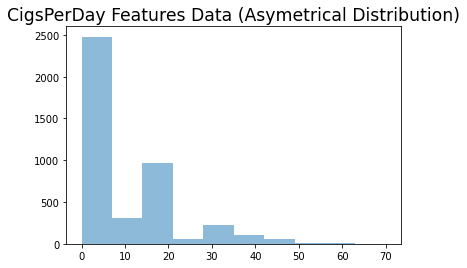

In [5]:
#Graphing data for the cigsPerDay column
plt.title("CigsPerDay Features Data (Asymetrical Distribution)", fontsize="xx-large" )
plt.hist(dataset['cigsPerDay'], alpha=0.5)

In [0]:
#Substituting median for all the NA values in the cigsPerDay column (Numerical data)
# if the data is symmetrical then we use the mean to impute all NA Values
# else if the data is assymetrical then we use the median to impute all NA Values
cigsPerDay_median=dataset['cigsPerDay'].median()
dataset['cigsPerDay'].fillna(cigsPerDay_median,inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.640e+02, 1.555e+03, 1.898e+03, 5.030e+02, 6.000e+01, 7.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([107. , 165.9, 224.8, 283.7, 342.6, 401.5, 460.4, 519.3, 578.2,
        637.1, 696. ]),
 <a list of 10 Patch objects>)

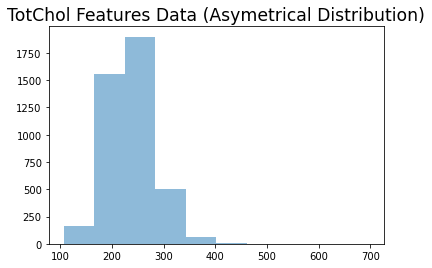

In [7]:
#Graphing data for the totChol column
plt.title("TotChol Features Data (Asymetrical Distribution)", fontsize="xx-large" )
plt.hist(dataset['totChol'], alpha=0.5)

In [0]:
#Substituting median for all the NA values in the totChol column (Numerical data)
# if the data is symmetrical then we use the mean to impute all NA Values
# else if the data is assymetrical then we use the median to impute all NA Values
totChol_median=dataset['totChol'].median()
dataset['totChol'].fillna(totChol_median,inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.580e+02, 1.211e+03, 1.751e+03, 8.240e+02, 1.960e+02, 5.800e+01,
        1.700e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([15.54 , 19.666, 23.792, 27.918, 32.044, 36.17 , 40.296, 44.422,
        48.548, 52.674, 56.8  ]),
 <a list of 10 Patch objects>)

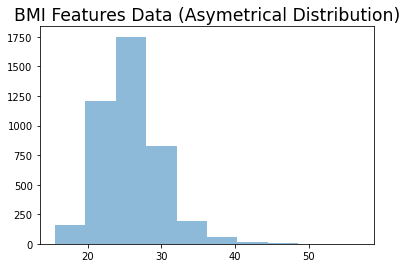

In [9]:
#Graphing data for the BMI column
plt.title("BMI Features Data (Asymetrical Distribution)", fontsize="xx-large" )
plt.hist(dataset['BMI'], alpha=0.5)

In [0]:
#Substituting median for all the NA values in the BMI column (Numerical data)
# if the data is symmetrical then we use the mean to impute all NA Values
# else if the data is assymetrical then we use the median to impute all NA Values
BMI_median=dataset['BMI'].median()
dataset['BMI'].fillna(BMI_median,inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  61.,  538., 1261., 1357.,  646.,  286.,   70.,   14.,    4.,
           2.]),
 array([ 44. ,  53.9,  63.8,  73.7,  83.6,  93.5, 103.4, 113.3, 123.2,
        133.1, 143. ]),
 <a list of 10 Patch objects>)

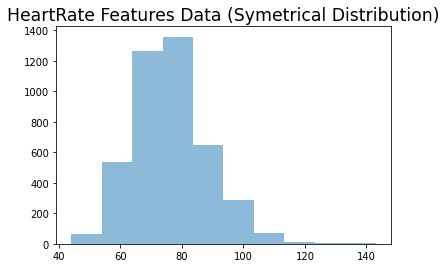

In [11]:
#Graphing data for the heartRate column
plt.title("HeartRate Features Data (Symetrical Distribution)", fontsize="xx-large" )
plt.hist(dataset['heartRate'], alpha=0.5)

In [0]:
#Substituting mean for all the NA values in the HeartRate column (Numerical data)
# if the data is symmetrical then we use the mean to impute all NA Values
# else if the data is assymetrical then we use the median to impute all NA Values
heartRate_mean=dataset['heartRate'].mean()
dataset['heartRate'].fillna(heartRate_mean,inplace=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1573., 2098.,  127.,   16.,   13.,    6.,    7.,    4.,    3.,
           5.]),
 array([ 40. ,  75.4, 110.8, 146.2, 181.6, 217. , 252.4, 287.8, 323.2,
        358.6, 394. ]),
 <a list of 10 Patch objects>)

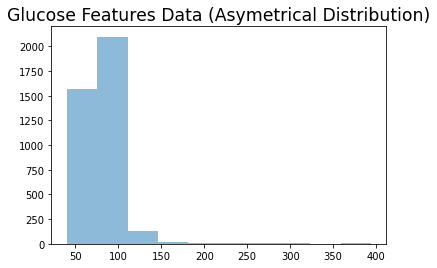

In [13]:
#Graphing data for the glucose column
plt.title("Glucose Features Data (Asymetrical Distribution)", fontsize="xx-large" )
plt.hist(dataset['glucose'], alpha=0.5)

In [0]:
#Substituting mean for all the NA values in the Glucose column (Numerical data)
# if the data is symmetrical then we use the mean to impute all NA Values
# else if the data is assymetrical then we use the median to impute all NA Values
glucose_median=dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median,inplace=True)

In [15]:
#Shows the count of NA Values for all the columns of the dataset
#we no longer have missing data for cigsPerDay totChol, BMI, heartRate and glucose columns
#We still have missing data for education & BPMeds columns only
print('Shows the count of NA Values for all the columns of the dataset:\n', dataset.isnull().sum())

Shows the count of NA Values for all the columns of the dataset:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1720.,    0.,    0., 1253.,    0.,    0.,  689.,    0.,    0.,
         473.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

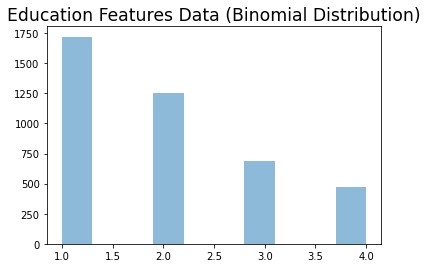

In [16]:
plt.title("Education Features Data (Binomial Distribution)", fontsize="xx-large" )
plt.hist(dataset['education'], alpha=0.5)

In [17]:
print('Finding the frequency of all the values in the education column:\n', dataset['education'].value_counts())

Finding the frequency of all the values in the education column:
 1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64


In [18]:
education_mode=dataset['education'].value_counts().index[0] # index 0 has highest frequency of occurence which is 1.0
education_mode

1.0

In [0]:
#replace all the NA values with 1.0 in the education column
dataset['education'].fillna(education_mode,inplace=True)

In [20]:
#Shows the count of NA Values for all the columns of the dataset
#we no longer have missing data for the education column
#we still have missing data for the BPMeds column
print('Shows the count of NA Values for all the columns of the dataset:\n', dataset.isnull().sum())

Shows the count of NA Values for all the columns of the dataset:
 male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4063.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

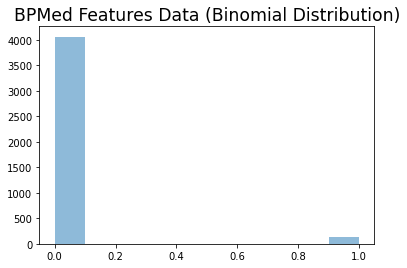

In [21]:
plt.title("BPMed Features Data (Binomial Distribution)", fontsize="xx-large" )
plt.hist(dataset['BPMeds'], alpha=0.5)

In [22]:
print('Finding the frequency of all the values in the BPMeds column:\n', dataset['BPMeds'].value_counts())

Finding the frequency of all the values in the BPMeds column:
 0.0    4063
1.0     124
Name: BPMeds, dtype: int64


In [23]:
BPMeds_mode=dataset['BPMeds'].value_counts().index[0] # index 0 has highest frequency of occurence which is 1.0
BPMeds_mode

0.0

In [0]:
#replace all the NA values with 0.0 in the education column
dataset['BPMeds'].fillna(BPMeds_mode,inplace=True)

In [25]:
#Shows the count of NA Values for all the columns of the dataset
#we no longer have missing data for any of the columns in our dataset
print('Shows the count of NA Values for all the columns of the dataset:\n', dataset.isnull().sum())

Shows the count of NA Values for all the columns of the dataset:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [26]:
#Creating the feature matrix from the cleansed dataset
X=dataset.iloc[:,:-1].values #include all the rows of all the columns except for the last column
print("Displaying the feature matrix from the cleansed dataset:\n", X)
print("\nSize of the X Matrix:\n",X.shape)

Displaying the feature matrix from the cleansed dataset:
 [[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  0.    52.     2.   ...  21.47  80.   107.  ]
 [  1.    40.     3.   ...  25.6   67.    72.  ]
 [  0.    39.     3.   ...  20.91  85.    80.  ]]

Size of the X Matrix:
 (4240, 15)


In [27]:
#Creating the target vector from the cleanset dataset
y=dataset.iloc[:,15].values #include all the rows of the last column
print('Displaying the target vector from the cleansed dataset:\n', y)
print("\nSize of the Y Vector:\n",y.shape)

Displaying the target vector from the cleansed dataset:
 [0 0 0 ... 0 0 0]

Size of the Y Vector:
 (4240,)


<h1 style="color:red"> 
3. Encoding Categorical Variable Columns (One Hot Encoding for X Matrix and Label Encoding for Y Vector)
</h1>

#### ------------------------------------------------------What is One Hot Encoding------------------------------------------------------
##### One hot encoding is used for converting columns that contain categorical data into numerical data (1’s and 0’s). One Hot Encoding is useful because a machine learning models only accepts numerical data for doing predictions.            
#### --------------------Rationale for why we didnt do One Hot Encoding or Label Encoding---------------------------
##### X Column's (age, cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate and glucose) are numerical data types; One Hot Encoding was not performed for these X Columns                                                                    
##### X Column's (male, education, currentSmoker, BPMeds, prevalentStroke and diabetes) consists of 1's and 0's; One Hot Encoding was not performed for these X Columns     
##### X Column's (male, education, currentSmoker, BPMeds, prevalentStroke and diabetes) consists of 1's and 0's; One Hot Encoding was not performed for these X Columns                  
##### Y Column (TenYearCHD) consists of 1's and 0's; Label Encoding was not performed on the Y Column

In [28]:
#Splitting the dataset into 80% training dataset and 20% testing dataset from the cleansed dataset
# random state = 0 ensures that the data is not being split randomly everytiem
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

print('\nDataset sizes')
print('\t X_train size:', X_train.shape)
print('\t y_train size:', y_train.shape)
print('\t X_test size:', X_test.shape)
print('\t y_test size:', y_test.shape)


Dataset sizes
	 X_train size: (3392, 15)
	 y_train size: (3392,)
	 X_test size: (848, 15)
	 y_test size: (848,)


<h1 style="color:red"> 
4. Feature Selection (Using Backward Selection to drop columns with no impact on the classification models prediction)
</h1>

In [29]:
#1st iteration of the backward elimination
#Note: p values that are greater than 0.05 have to be incrementally deleted)
#Backward Elimination
import statsmodels.api as sm
obj_OLS = sm.OLS(endog = y, exog = X).fit()
obj_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.224
Model:                            OLS   Adj. R-squared (uncentered):              0.221
Method:                 Least Squares   F-statistic:                              81.29
Date:                Sat, 02 May 2020   Prob (F-statistic):                   3.06e-219
Time:                        20:11:40   Log-Likelihood:                         -1483.3
No. Observations:                4240   AIC:                                      2997.
Df Residuals:                    4225   BIC:                                      3092.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0492      0.012      4.221      0.000       0.026       0.072
x2             0.0049      0.001      7.331      0.000       0.004       0.006
x3            -0.0125      0.005     -2.448      0.014      -0.023      -0.003
x4            -0.0196      0.016     -1.198      0.231      -0.052       0.012
x5             0.0028      0.001      3.979      0.000       0.001       0.004
x6             0.0678      0.033      2.063      0.039       0.003       0.132
x7             0.1878      0.070      2.697      0.007       0.051       0.324
x8             0.0836      0.015      5.715      0.000       0.055       0.112
x9             0.1090      0.041      2.643      0.008       0.028       0.190
x10        -9.126e-05      0.000     -0.742      0.458      -0.000       0.000
x11            0.0020      0.000      4.284      0.000       0.001       0.003
x12           -0.0025      0.001     -3.456      0.001      -0.004      -0.001
x13           -0.0040      0.001     -2.911      0.004      -0.007      -0.001
x14           -0.0014      0.000     -3.376      0.001      -0.002      -0.001
x15            0.0006      0.000      2.086      0.037    3.59e-05       0.001
==============================================================================
Omnibus:                     1228.281   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2623.795
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                       4.639   Cond. No.                     4.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
#Backward Elimination Function
import statsmodels.api as sm

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        obj_OLS = sm.OLS(y, x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    obj_OLS.summary()
    return x

In [0]:
X_BE = backwardElimination(X, 0.05)

In [32]:
#Verifying the last iteration of Backward Elimination
#Note: all P-values are below 0.05 so no more columns to remove)
import statsmodels.api as sm
obj_OLS = sm.OLS(endog = y, exog = X_BE).fit()
obj_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.224
Model:                            OLS   Adj. R-squared (uncentered):              0.221
Method:                 Least Squares   F-statistic:                              93.64
Date:                Sat, 02 May 2020   Prob (F-statistic):                   8.92e-221
Time:                        20:11:40   Log-Likelihood:                         -1484.4
No. Observations:                4240   AIC:                                      2995.
Df Residuals:                    4227   BIC:                                      3077.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0503      0.012      4.335      0.000       0.028       0.073
x2             0.0048      0.001      7.481      0.000       0.004       0.006
x3            -0.0131      0.005     -2.569      0.010      -0.023      -0.003
x4             0.0022      0.000      4.535      0.000       0.001       0.003
x5             0.0675      0.033      2.056      0.040       0.003       0.132
x6             0.1890      0.070      2.715      0.007       0.053       0.326
x7             0.0861      0.015      5.927      0.000       0.058       0.115
x8             0.1122      0.041      2.723      0.006       0.031       0.193
x9             0.0020      0.000      4.245      0.000       0.001       0.003
x10           -0.0026      0.001     -3.570      0.000      -0.004      -0.001
x11           -0.0040      0.001     -2.963      0.003      -0.007      -0.001
x12           -0.0015      0.000     -3.637      0.000      -0.002      -0.001
x13            0.0006      0.000      1.997      0.046    1.05e-05       0.001
==============================================================================
Omnibus:                     1228.159   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2622.430
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                       4.634   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
print(X_BE[0:5])
print("\nOnly Independant Variables (X1-X6) have impact on predicting Y:")
print("\t Column 1(x0) = column of 1s")
print("\t Column 2(X1) = male")
print("\t Column 3(x2) = age")
print("\t Column 4(x3) = cigsPerDay")
print("\t Column 5(X4) = prevalentStroke")
print("\t Column 6(x5) = sysBP")
print("\t Column 7(x6) = glucose ")
print("\t Column Y = TenYearCHD")

X_BE.shape # X matrix is updated to remove columns while still retaining all the rows per the Backward Elimination Results

[[  1.    39.     4.     0.     0.     0.     0.     0.   106.    70.
   26.97  80.    77.  ]
 [  0.    46.     2.     0.     0.     0.     0.     0.   121.    81.
   28.73  95.    76.  ]
 [  1.    48.     1.    20.     0.     0.     0.     0.   127.5   80.
   25.34  75.    70.  ]
 [  0.    61.     3.    30.     0.     0.     1.     0.   150.    95.
   28.58  65.   103.  ]
 [  0.    46.     3.    23.     0.     0.     0.     0.   130.    84.
   23.1   85.    85.  ]]

Only Independant Variables (X1-X6) have impact on predicting Y:
	 Column 1(x0) = column of 1s
	 Column 2(X1) = male
	 Column 3(x2) = age
	 Column 4(x3) = cigsPerDay
	 Column 5(X4) = prevalentStroke
	 Column 6(x5) = sysBP
	 Column 7(x6) = glucose 
	 Column Y = TenYearCHD


(4240, 13)

In [34]:
X_BE=dataset.iloc[:,[0,1,4,6,10,14]].values # Storing the column subset from the X Matrix per the Backward Elimination Results
X_BE

array([[  1. ,  39. ,   0. ,   0. , 106. ,  77. ],
       [  0. ,  46. ,   0. ,   0. , 121. ,  76. ],
       [  1. ,  48. ,  20. ,   0. , 127.5,  70. ],
       ...,
       [  0. ,  52. ,   0. ,   0. , 133.5, 107. ],
       [  1. ,  40. ,   0. ,   0. , 141. ,  72. ],
       [  0. ,  39. ,  30. ,   0. , 133. ,  80. ]])

<h1 style="color:red"> 
5. Splitting the dataset into training and testing datasets
</h1>

In [35]:
#Splitting the dataset into 80% training dataset and 20% testing dataset from the cleansed dataset
# random state = 0 ensures that the data is not being split randomly everytiem
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_BE,y,test_size=0.2, random_state=0)

print('\nDataset sizes')
print('\t X_train_BE size:', X_train.shape)
print('\t y_train size:', y_train.shape)
print('\t X_test_BE size:', X_test.shape)
print('\t y_test size:', y_test.shape)


Dataset sizes
	 X_train_BE size: (3392, 6)
	 y_train size: (3392,)
	 X_test_BE size: (848, 6)
	 y_test size: (848,)


<h1 style="color:red"> 
6. Normalizing the training and testing datasets
</h1>

In [0]:
#Before we create our classifier, we have to normalize the data (feature scaling) using the
#Scikit-Learn preprocessing package's StandardScalar function .
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_BE = sc_x.fit_transform(X_train)# fitting & transforming the training dataset
X_test_BE = sc_x.transform(X_test) # transforming the testing dataset

In [37]:
print('\t X_train_BE size:', X_train_BE.shape)
print('\t X_test_BE size:', X_test_BE.shape)

	 X_train_BE size: (3392, 6)
	 X_test_BE size: (848, 6)


<h1 style="color:red"> 
7. Model Studies (After Backward Elimination)
</h1>

<h2 style="color:red"> 
7.1 Linear SVM (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8514150943396226
	Misclassification (Wrong Prediction Rate): 0.1485849056603774


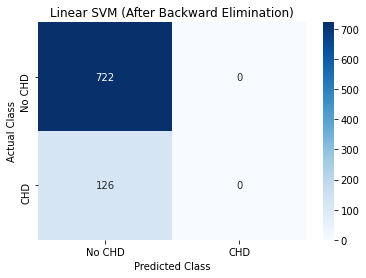

<Figure size 72x72 with 0 Axes>

In [38]:
from sklearn import svm # Importing model library
obj = svm.SVC(kernel='linear', gamma="auto") # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc1=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc1)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc1))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("Linear SVM (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.2 RBF SVM (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8514150943396226
	Misclassification (Wrong Prediction Rate): 0.1485849056603774


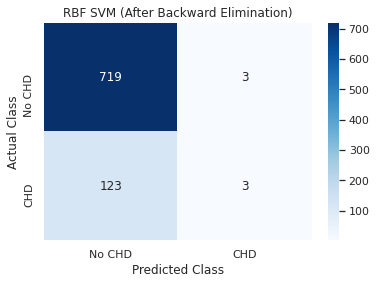

<Figure size 72x72 with 0 Axes>

In [39]:
from sklearn import svm # Importing model library
obj = svm.SVC(kernel='rbf', gamma="auto") # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc2=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc2)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc2))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("RBF SVM (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.3 Poly SVM (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8502358490566038
	Misclassification (Wrong Prediction Rate): 0.14976415094339623


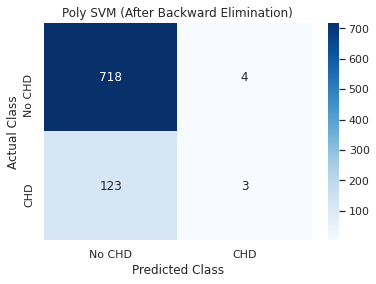

<Figure size 72x72 with 0 Axes>

In [40]:
from sklearn import svm # Importing model library
obj = svm.SVC(kernel='poly', gamma="auto") # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc3=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc3)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc3))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("Poly SVM (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.4 Logistic Regression (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8596698113207547
	Misclassification (Wrong Prediction Rate): 0.1403301886792453


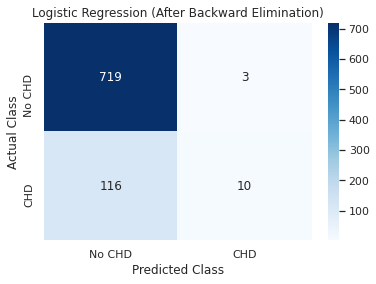

<Figure size 72x72 with 0 Axes>

In [41]:
from sklearn.linear_model import LogisticRegression # Importing model library
obj = LogisticRegression(solver='lbfgs') # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc4=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc4)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc4))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("Logistic Regression (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.5 Naive Bayes (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8443396226415094
	Misclassification (Wrong Prediction Rate): 0.1556603773584906


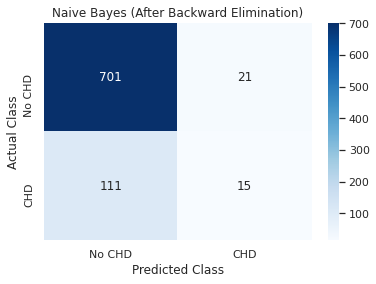

<Figure size 72x72 with 0 Axes>

In [42]:
from sklearn.naive_bayes import GaussianNB # Importing model library
obj = GaussianNB() # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc5=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc5)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc5))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("Naive Bayes (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.6 Random Forest (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8360849056603774
	Misclassification (Wrong Prediction Rate): 0.1639150943396226


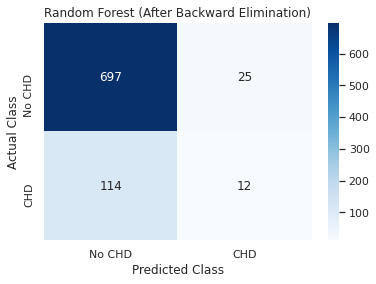

<Figure size 72x72 with 0 Axes>

In [43]:
from sklearn.ensemble import RandomForestClassifier # Importing model library
obj = RandomForestClassifier() # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc6=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc6)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc6))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("Random Forest (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.7 KNN (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.8384433962264151
	Misclassification (Wrong Prediction Rate): 0.16155660377358494


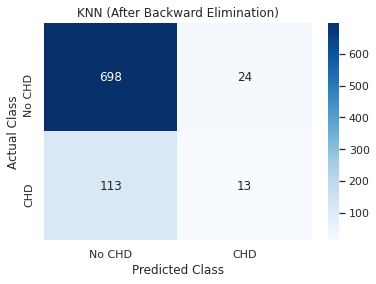

<Figure size 72x72 with 0 Axes>

In [44]:
from sklearn.neighbors import KNeighborsClassifier # Importing model library
obj = KNeighborsClassifier() # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc7=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc7)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc7))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("KNN (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h2 style="color:red"> 
7.8 Decision Tree (After Backward Elimination)
</h2>

	Accuracy (Right Prediction Rate): 0.7558962264150944
	Misclassification (Wrong Prediction Rate): 0.24410377358490565


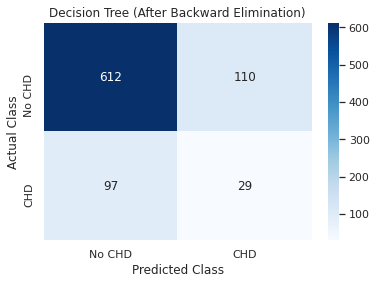

<Figure size 72x72 with 0 Axes>

In [45]:
from sklearn.tree import DecisionTreeClassifier # Importing model library
obj = DecisionTreeClassifier() # creating a model object
obj.fit(X_train_BE, y_train) #Training the model
y_pred=obj.predict(X_test_BE) # making predictions on the training model

#Evaluating the trained models prediction
acc8=obj.score(X_test_BE,y_test)
cm = confusion_matrix(y_test, y_pred)
gPreds=cm[0,0]+cm[1,1]
bPreds=cm[0,1]+cm[1,0]
allPreds=cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
print('\tAccuracy (Right Prediction Rate):',acc8)
print('\tMisclassification (Wrong Prediction Rate):',(1-acc8))

xlabels=['No CHD','CHD']
ylabels=['No CHD','CHD']
df_cm = pd.DataFrame(cm,index=xlabels,columns=ylabels)
df_cm.index.name = 'Actual Class'
df_cm.columns.name = 'Predicted Class'
heatmap_cm=sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
heatmap_cm.set_title("Decision Tree (After Backward Elimination)")
plt.figure(figsize = (1,1))
sns.set(font_scale=1)

<h1 style="color:red"> 
7. Model Studies Comparison (After Backward Elimination)
</h1>

In [46]:
#create the dataframe
import pandas as pd

data = {
        'Model Name': ['Linear SVM', 'RBF SVM','Poly SVM', 'Logistic Regression', 'Naive Bayes',
                       'Random Forest', 'KNN','Decision Tree'],
    
        'Model Accuracy(After Backward Elimination)':[acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]
       }
df_Accuracy=pd.DataFrame(data)
df_Accuracy

,Model Name,Model Accuracy(After Backward Elimination)
0,Linear SVM,0.851415
1,RBF SVM,0.851415
2,Poly SVM,0.850236
3,Logistic Regression,0.859670
4,Naive Bayes,0.844340
5,Random Forest,0.836085
6,KNN,0.838443
7,Decision Tree,0.755896


In [47]:
#sorted dataframe (descending order aka 1st row of the Model Score column shows the max value)
df_SortedAccuracy= df_Accuracy.sort_values(by='Model Accuracy(After Backward Elimination)', ascending=False) 
df_SortedAccuracy

,Model Name,Model Accuracy(After Backward Elimination)
3,Logistic Regression,0.859670
0,Linear SVM,0.851415
1,RBF SVM,0.851415
2,Poly SVM,0.850236
4,Naive Bayes,0.844340
6,KNN,0.838443
5,Random Forest,0.836085
7,Decision Tree,0.755896


<h1 style="color:red"> 
Conclusion: Logistic Regression gives max accuracy
</h1>